In [1]:
%matplotlib inline
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import cm
import matplotlib.pyplot as plt

plt.style.use('science')

# Diffusion-Advection Equation

$$ \frac{\partial n}{\partial t} = -u \frac{\partial n}{\partial x} + D \frac{\partial^2 n}{\partial x^2}$$
com $D$ sendo o coeficiente de difusão.

$$u(x,t) = \frac{1}{L} \sum_k \widehat{u}_k(t) e^{i k x }$$
onde 
$$\widehat{u}_k(t) = \mathcal{FT}\{u(x,t) \} = \int d x\ u(x,t)e^{i k x }$$
and $k = \{-\pi N/L, -\pi(N-1)/L, \ldots, \pi(N-1)/L,\pi N/L\}$ where $N = L/\Delta$ and $\Delta$ is the stepsize of the meshgrid.

In [8]:
import numpy as np
from scipy.fft import fft, ifft
# Size of the system
x = np.linspace(-1.0,1.0,2**7)
N = x.size
dx = x[1]-x[0]
# The time step definition
dt = 0.01
Nsteps = 100
# Initial condition
n0 = np.zeros_like(x)
l = int(0.2/dx)
n0[5:5+l] = 1.0 
# The vector of variables
n_hat = np.empty(N, dtype=np.complex64)
n = np.empty((Nsteps,N), dtype=np.float32)
n[0] = n0
# The Fourier variables and dealising vector
k = np.fft.fftfreq(N, d=dx)*2*np.pi
# The linear terms of PDE
def linear_terms_ft(k):
    # diffusion-advection constants
    D = 0.01
    u = 1.5
    return -1.0j*k*u-D*k**2
# Defining the time derivative arrays
dndtlinear_hat = np.exp(dt*linear_terms_ft(k)) # can be calculated once
# time evolution loop
n_hat[:] = fft(n[0]) # FT initial condition
for i in range(1,Nsteps):
    n_hat[:] = n_hat*dndtlinear_hat # updating in time
    n[i] = ifft(n_hat).real # IFT to next step

The Fourier transform of the dynamical equation is 

$$\frac{\partial \hat{u}_{k}}{\partial t} = -D k^2 \hat{u}_{k} $$

cuja solução analítica é dada por 

$$\hat{u}_{k}(t) = \hat{u}_{k}(0) e^{-D k^2 t}$$

ou podemos calcular numericamente usando um método de Euler implícito, tal que 

$$\frac{\hat{u}_{k}^{n+1}-\hat{u}_{k}^{n}}{\Delta t} = -D k^2 \hat{u}_{k}^{n+1}$$

resultando em 

$$\hat{u}_{k}^{n+1} = \frac{\hat{u}_{k}^{n}}{(1+\Delta t D k^2)}$$

com $t_n = n \Delta t$. 

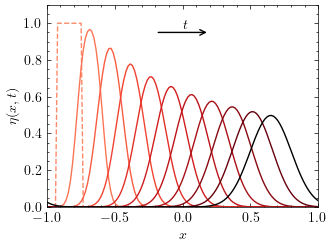

In [9]:
fig, ax = plt.subplots(1,1)

my_map = cm.get_cmap('Reds')
color = my_map(np.linspace(0.4,1.0,Nsteps//10))
plt.plot(x,n[0],'--',color=color[0])
for i in range(1,Nsteps//10):
    plt.plot(x,n[10*i],'-',color=color[i])
plt.plot(x,n[-1],'-k')
plt.xlabel('$x$')
plt.ylabel('$\eta(x,t)$')
plt.annotate("", xy=(0.2, 0.95), xytext=(-0.2, 0.95),
            arrowprops=dict(arrowstyle="->"))
plt.text(0.0,0.97,"$t$")
plt.xlim(-1.0,1.0)
plt.ylim(0.,1.1)
fig.savefig('diffusion_advection.pdf')

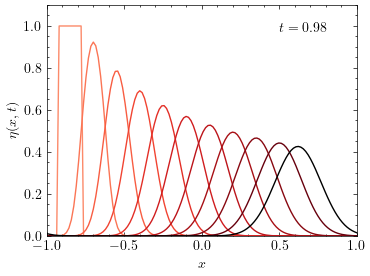

In [30]:
my_map = cm.get_cmap('Reds')
color = my_map(np.linspace(0.4,1.0,10))
def animate(i):
    ax.clear()
    for j in range(i//10+1):
        ax.plot(x,n[10*j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(0.5,0.97,'$t={:.2f}$'.format(i*dt))
    ax.set_xlim(-1,1)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= 99,
                               interval = 50)
writervideo = animation.FFMpegWriter(fps=30) 
ani.save('diffusion_advection.mp4',writer=writervideo,dpi=200)

# Equação de Advecção

$$ \frac{\partial u}{\partial t} =- c\frac{\partial u}{\partial x}$$

cuja transformada de Fourier é

$$\frac{\partial \hat{u}_{k}}{\partial t} = -c i k \hat{u}_{k} $$

que pode ser resolvida numericamente usando um método de Euler implícito, tal que 

$$\frac{\hat{u}_{k}^{n+1}-\hat{u}_{k}^{n}}{\Delta t} = -c i k \hat{u}_{k}^{n+1}$$

resultando em 

$$\hat{u}_{k}^{n+1} = \frac{\hat{u}_{k}^{n}}{(1+i \Delta t c k)}$$

com $t_n = n \Delta t$. 

Text(0, 0.5, '$u(x,0)$')

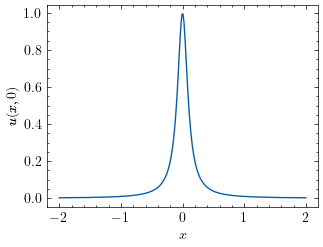

In [196]:
x = np.linspace(-2.0,2.0,256)
N = x.size
dx = x[1]-x[0]

a = 0.1
u0 = a**2/(a**2+x**2)

c = 0.1

plt.plot(x,u0)
plt.xlabel('$x$')
plt.ylabel('$u(x,0)$')

In [197]:
k = np.fft.fftfreq(N, d=dx)*2*np.pi

dt = 3.0/(c*max(k))
Nsteps = 200

In [198]:
u_hat = np.empty(N, dtype=np.complex64)
u = np.empty((Nsteps,N), dtype=np.float32)
u[0] = u0

In [199]:
u_hat[:] = fft(u[0])
for i in range(1,Nsteps):
#     u_hat[:] = u_hat/(1+1.0j*dt*c*k) # updating in time
    u_hat[:] = u_hat*np.exp(-1.0j*dt*c*k) # updating in time
    u[i] = ifft(u_hat).real # inverse fourier transform

Text(0, 0.5, '$u(x,t)$')

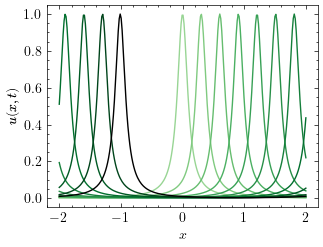

In [200]:
my_map = cm.get_cmap('Greens')
color = my_map(np.linspace(0.4,1.0,Nsteps//20))
for i in range(Nsteps//20):
    plt.plot(x,u[20*i],'-',color=color[i])
plt.plot(x,u[-1],'-k')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')

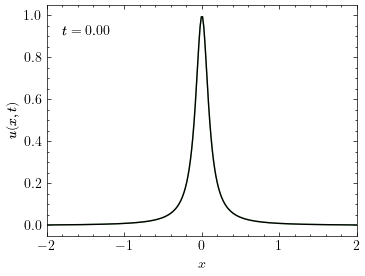

In [201]:
my_map = cm.get_cmap('Greens')
color = my_map(np.linspace(0.4,1.0,10))

def animate(i):
    ax.clear()
    for j in range(i//10+1):
        ax.plot(x,u[20*j],'-',color=color[j])
    ax.plot(x,u[2*i],'-',color='k')
    ax.text(-1.8,0.9,'$t={:.2f}$'.format(2*i*dt))
    ax.set_xlim(-2,2)
    ax.set_ylim(-0.05,1.05)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$u(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= 99,
                               interval = 50)
ani.save('advection.gif',writer='pillow',fps=60,dpi=100)

# Equação de Burges

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$$

The Fourier transform of the dynamical equation is 

$$\frac{\partial \hat{u}_{k}}{\partial t} = - \mathcal{FT}\{u\frac{\partial u}{\partial x} \} -\nu k^2 \hat{u}_{k} $$

cuja solução pode ser obtida numericamente usando um método de *operator splitting* tal que 
$$\hat{u}_{k}^{n+1/2}= \hat{u}_{k}^{n} - \Delta t \mathcal{FT}\{u\frac{\partial u}{\partial x} \}^n$$

$$\hat{u}_{k}^{n+1} = \hat{u}_{k}^{n+1/2} e^{-\Delta t \nu k^2}$$

com $t_n = n \Delta t$. 

In [5]:
import numpy as np
from scipy.fft import fft, ifft
# Size of the system
x = np.linspace(-1.0,1.0,2**7)
N = x.size
dx = x[1]-x[0]
# The time step definition
dt = 0.01
Nsteps = 100
# Initial condition
n0 = np.zeros_like(x)
l = int(0.2/dx)
n0[N//2:N//2+l] = 1.0 
# The vector of variables
n_hat = np.empty(N, dtype=np.complex64)
n = np.empty((Nsteps,N), dtype=np.float32)
n[0] = n0
# The Fourier variables and dealising vector
k = np.fft.fftfreq(N, d=dx)*2*np.pi
kmax_dealias = k.max()*2.0/3.0 # The Nyquist mode
dealias = np.array((np.abs(k) < kmax_dealias ),dtype =bool)
# The linear terms of PDE
def linear_terms_ft(k):
    nu = 0.01
    return -nu*k**2
# The non-linear terms of PDE (with dealising)
def nonlinear_terms_ft(n,k):
    return (-0.5j*k*fft(n**2))*dealias
# Defining the time derivative arrays
dndtlinear_hat = np.exp(dt*linear_terms_ft(k)) # can be calculated once
dndtnonlinear_hat = n_hat.copy()
# time evolution loop
n_hat[:] = fft(n[0]) # FT initial condition
for i in range(1,Nsteps):
    dndtnonlinear_hat[:] = nonlinear_terms_ft(n[i-1],k) # calculate the non-linear term
    n_hat[:] = (n_hat+dt*dndtnonlinear_hat)*dndtlinear_hat # updating in time
    n[i] = ifft(n_hat).real # IFT to next step

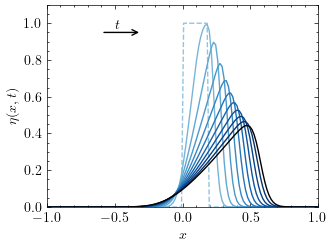

In [4]:
fig, ax = plt.subplots(1,1)

my_map = cm.get_cmap('Blues')
color = my_map(np.linspace(0.4,1.0,Nsteps//10))
plt.plot(x,n[0],'--',color=color[0])
for i in range(1,Nsteps//10):
    plt.plot(x,n[10*i],'-',color=color[i])
plt.plot(x,n[-1],'-k')
plt.xlabel('$x$')
plt.ylabel('$\eta(x,t)$')
plt.annotate("", xy=(-0.3, 0.95), xytext=(-0.6, 0.95),
            arrowprops=dict(arrowstyle="->"))
plt.text(-0.5,0.97,"$t$")
plt.xlim(-1.0,1.0)
plt.ylim(0.,1.1)
fig.savefig('burgers.pdf')

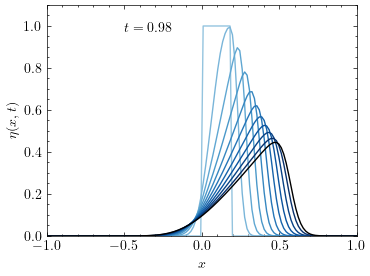

In [34]:
my_map = cm.get_cmap('Blues')
color = my_map(np.linspace(0.4,1.0,10))
def animate(i):
    ax.clear()
    for j in range(i//10+1):
        ax.plot(x,n[10*j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(-0.5,0.97,'$t={:.2f}$'.format(i*dt))
    ax.set_xlim(-1,1)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= 99,
                               interval = 50)
writervideo = animation.FFMpegWriter(fps=30) 
ani.save('burgers.mp4',writer=writervideo,dpi=200)

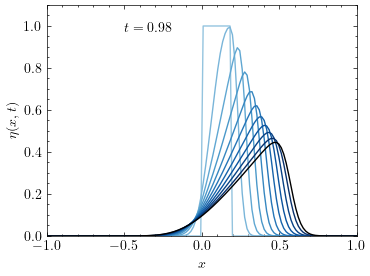

In [35]:
my_map = cm.get_cmap('Blues')
color = my_map(np.linspace(0.4,1.0,10))
def animate(i):
    ax.clear()
    for j in range(i//10+1):
        ax.plot(x,n[10*j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(-0.5,0.97,'$t={:.2f}$'.format(i*dt))
    ax.set_xlim(-1,1)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= 99,
                               interval = 50)
ani.save('burgers.gif',writer='pillow',fps=30,dpi=200)